# ***Klastorwanie klientów przy użyciu k-means***

Importowanie bibliotek

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Importowanie tabel

In [72]:
transactions = pd.read_csv('data for master thesis/transactions.csv')
transaction_items_prior = pd.read_csv('data for master thesis/transaction_items__prior.csv')
transaction_items_train = pd.read_csv('data for master thesis/transaction_items__train.csv')

In [73]:
transactions.head()

,Unnamed: 0,transaction_id,customer_id,eval_set,transaction_number,day_of_week,time_of_day,days_since_prior_order
0,0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN
1,1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0
2,2,473747.0,1.0,prior,3.0,3.0,12.0,21.0
3,3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0
4,4,431534.0,1.0,prior,5.0,4.0,15.0,28.0


In [74]:
transaction_items_prior.head()

,Unnamed: 0,transaction_id,item_id,add_to_cart_order,previous_bought
0,0,2.0,33120.0,1.0,1.0
1,1,2.0,28985.0,2.0,1.0
2,2,NaN,9327.0,3.0,0.0
3,3,2.0,45918.0,4.0,1.0
4,4,2.0,30035.0,5.0,0.0


In [75]:
transaction_items_train.head()

,Unnamed: 0,transaction_id,item_id,add_to_cart_order,previous_bought
0,0,1.0,49302.0,1.0,1.0
1,1,1.0,11109.0,2.0,1.0
2,2,1.0,10246.0,3.0,0.0
3,3,1.0,49683.0,4.0,0.0
4,4,1.0,43633.0,5.0,1.0


# **Modyfikacja danych**

Modyfikacja tabeli `transactions`

In [76]:
transactions.head()

,Unnamed: 0,transaction_id,customer_id,eval_set,transaction_number,day_of_week,time_of_day,days_since_prior_order
0,0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN
1,1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0
2,2,473747.0,1.0,prior,3.0,3.0,12.0,21.0
3,3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0
4,4,431534.0,1.0,prior,5.0,4.0,15.0,28.0


Sprawdzenie typu danych i unikatowych wartości

In [77]:
transactions.dtypes

Unnamed: 0                 int64
transaction_id            object
customer_id               object
eval_set                  object
transaction_number        object
day_of_week               object
time_of_day               object
days_since_prior_order    object
dtype: object

In [78]:
transactions.days_since_prior_order.unique()

array([nan, '15.0', '21.0', '29.0', '28.0', '19.0', '20.0', '14.0', '0.0',
       '30.0', '10.0', '3.0', '8.0', '13.0', '27.0', '6.0', '9.0', '12.0',
       '7.0', '17.0', '11.0', '4.0', '5.0', '2.0', 'unknown', '23.0',
       '26.0', '16.0', '1.0', '18.0', '24.0', '22.0', '25.0'],
      dtype=object)

Usunięcie kolumny `Unnamed`, wartości pustych i `unknown` w kolumnach `transaction_id`, `days_since_prior_order` oraz `customer_id`


In [79]:
transactions.loc[transactions.days_since_prior_order.isna(), 'days_since_prior_order'] = 0
transactions = transactions[transactions.days_since_prior_order != 'unknown']
transactions = transactions.drop(columns=['Unnamed: 0'])
transactions = transactions[(transactions.transaction_id.isna() == False) & (transactions.transaction_id != 'unknown')]
transactions = transactions[(transactions.customer_id.isna() == False) & (transactions.customer_id != 'unknown')]

Modyfikacja tabeli `transaction_items__prior`

In [80]:
transaction_items_prior.head()

,Unnamed: 0,transaction_id,item_id,add_to_cart_order,previous_bought
0,0,2.0,33120.0,1.0,1.0
1,1,2.0,28985.0,2.0,1.0
2,2,NaN,9327.0,3.0,0.0
3,3,2.0,45918.0,4.0,1.0
4,4,2.0,30035.0,5.0,0.0



Usunięcie kolumny `Unnamed`, wartości pustych i unknown w kolumnach `transaction_id` oraz `item_id`.


In [81]:
transaction_items_prior = transaction_items_prior[(transaction_items_prior.transaction_id.isna() == False) &
                                                  (transaction_items_prior.transaction_id != 'unknown')]

transaction_items_prior = transaction_items_prior[(transaction_items_prior.item_id.isna() == False) &
                                                  (transaction_items_prior.item_id != 'unknown')]

transaction_items_prior = transaction_items_prior.drop(columns=['Unnamed: 0'])

sum(transaction_items_prior.item_id.isna())

0

Modyfikacja tabeli `transaction_items_train`



In [82]:
transaction_items_train.head()


,Unnamed: 0,transaction_id,item_id,add_to_cart_order,previous_bought
0,0,1.0,49302.0,1.0,1.0
1,1,1.0,11109.0,2.0,1.0
2,2,1.0,10246.0,3.0,0.0
3,3,1.0,49683.0,4.0,0.0
4,4,1.0,43633.0,5.0,1.0


Usunięcie kolumny `Unnamed`, wartości pustych i `unknown` w kolumnach `transaction_id` oraz `item_id`.

In [83]:
transaction_items_train = transaction_items_train[(transaction_items_train.transaction_id.isna() == False) &
                                                  (transaction_items_train.transaction_id != 'unknown')]

transaction_items_train = transaction_items_train[(transaction_items_train.item_id.isna() == False) &
                                                  (transaction_items_train.item_id != 'unknown')]

transaction_items_train = transaction_items_train.drop(columns=['Unnamed: 0'])

print('Missing values in item_id:', sum(transaction_items_train.item_id.isna()))

Missing values in item_id: 0


Stworzenie tabeli z liczbą produktów na każdym paragonie z
`transaction_items_train` i `transaction_items_prior`

In [84]:
tran_item1 = transaction_items_train.groupby(['transaction_id'], as_index = False)['item_id'].count()
tran_item1.rename(columns = {'item_id':'item_count'}, inplace = True)
tran_item1

,transaction_id,item_count
0,1.0,8
1,100000.0,15
2,1000008.0,7
3,1000029.0,7
4,100003.0,1
...,...,...
130702,999879.0,5
130703,999926.0,11
130704,999964.0,1
130705,999971.0,12


In [85]:
tran_item2 = transaction_items_prior.groupby(['transaction_id'], as_index = False)['item_id'].count()
tran_item2.rename(columns = {'item_id':'item_count'}, inplace = True)
tran_item2

,transaction_id,item_count
0,10.0,13
1,100.0,2
2,1000.0,7
3,10000.0,14
4,1000000.0,3
...,...,...
3202291,999995.0,1
3202292,999996.0,6
3202293,999997.0,17
3202294,999998.0,14


Następnie łączymy te dwie tabele

In [86]:
tran_item = pd.concat([tran_item1, tran_item2], ignore_index=True)

Wybieramy niezbędne kolumny z `tabeli transactions`

In [87]:
to_cluster = transactions.loc[(transactions.eval_set == 'prior') | (transactions.eval_set == 'train'),
                              ['customer_id', 'transaction_id', 'days_since_prior_order']]
to_cluster

,customer_id,transaction_id,days_since_prior_order
0,1.0,2539329.0,0
1,1.0,2398795.0,15.0
2,1.0,473747.0,21.0
3,1.0,2254736.0,29.0
4,1.0,431534.0,28.0
...,...,...,...
3309513,206209.0,2266710.0,29.0
3309514,206209.0,1854736.0,30.0
3309515,206209.0,626363.0,18.0
3309516,206209.0,2977660.0,7.0


Łączymy tabelę `to_cluster` z `tran_item`


In [88]:
to_cluster = to_cluster.merge(tran_item, how='left', on='transaction_id')
to_cluster.head()

,customer_id,transaction_id,days_since_prior_order,item_count
0,1.0,2539329.0,0,5
1,1.0,2398795.0,15.0,6
2,1.0,473747.0,21.0,5
3,1.0,2254736.0,29.0,4
4,1.0,431534.0,28.0,8


Sprawdźmy typy kolumn w tabeli `to_cluster`

In [89]:
to_cluster.dtypes

customer_id               object
transaction_id            object
days_since_prior_order    object
item_count                 int64
dtype: object

Zmieniamy typ danych na zmiennoprzecinkowy w kolumnach `days_since_prior_order` oraz obliczamy ilość warotości `null`

In [90]:
to_cluster.days_since_prior_order = to_cluster.days_since_prior_order.astype(float)
to_cluster.item_count = to_cluster.item_count.astype(float)

In [91]:
print('Number of missing values in transaction_id: ', sum(to_cluster.transaction_id.isna()))
print('Number of missing values in days_since_prior_order: ', sum(to_cluster.days_since_prior_order.isna()))
print('Number of missing values in item_count: ', sum(to_cluster.item_count.isna()))

Number of missing values in transaction_id:  0
Number of missing values in days_since_prior_order:  0
Number of missing values in item_count:  0


Stworzenie tabeli `grouped_customer`, która przedstawia ilość transakcji, średnią ilość dni między transakcjami oraz średnią ilość zakupionych produktów na paragonie dla każdego klienta.

In [92]:
grouped_customer = to_cluster.groupby('customer_id').aggregate({'transaction_id':'count',
                                                                 'days_since_prior_order':'mean',
                                                                 'item_count':'mean'})

grouped_customer.rename(columns = {'transaction_id': 'count_transaction_id',
                                    'days_since_prior_order': 'mean_days_since_prior_order',
                                    'item_count':'mean_item_count'}, inplace = True)
grouped_customer

,count_transaction_id,mean_days_since_prior_order,mean_item_count
customer_id,,,
1.0,10,16.000000,5.900000
10.0,5,21.800000,25.800000
100.0,4,19.500000,6.000000
1000.0,7,12.428571,13.428571
10000.0,64,4.578125,13.859375


In [93]:
grouped_customer.dtypes

count_transaction_id             int64
mean_days_since_prior_order    float64
mean_item_count                float64
dtype: object

In [94]:
grouped_customer.head()

,count_transaction_id,mean_days_since_prior_order,mean_item_count
customer_id,,,
1.0,10,16.000000,5.900000
10.0,5,21.800000,25.800000
100.0,4,19.500000,6.000000
1000.0,7,12.428571,13.428571
10000.0,64,4.578125,13.859375


In [95]:
grouped_customer.describe()

,count_transaction_id,mean_days_since_prior_order,mean_item_count
count,206190.00000,206190.000000,206190.000000
mean,14.28078,12.996724,9.272964
std,14.73278,5.701952,5.447373
min,1.00000,0.000000,1.000000
25%,5.00000,8.500000,5.333333
50%,9.00000,12.684211,8.307692
75%,18.00000,17.142857,12.032006
max,98.00000,30.000000,58.400000


Zmiana nazw kolumn

In [96]:
d = {'count_transaction_id': 'Number of transactions',
     'mean_days_since_prior_order': 'Average number of days between orders',
     'mean_item_count': 'Average number of items per transaction'}

Stworzenie histogramów dla poszczególnych zmiennych: `Number of transactions`, `Average number of days between orders`, `Average number of items per transaction`

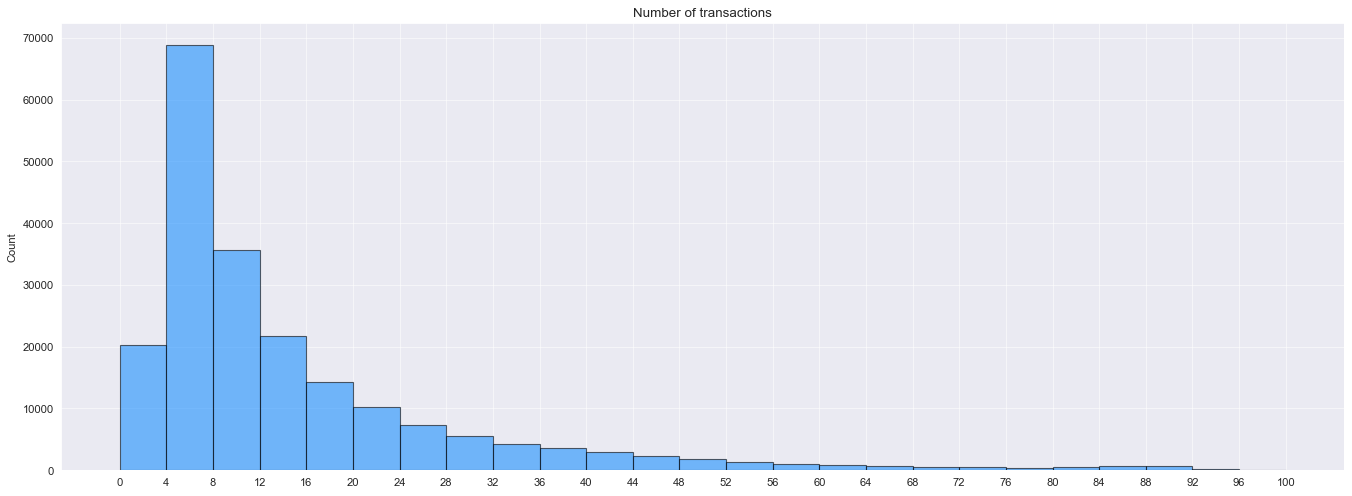

In [114]:
i=0
fig = figure(figsize=(17, 18), dpi=80)

bins_list = np.linspace(start=0,
                            stop=100,
                            num=26)

ax = fig.add_subplot(3,1,i+1)
n, bins, edges = plt.hist(grouped_customer.iloc[:,i],
                                bins= bins_list,
                                ec="k",
                                color = "dodgerblue",
                                alpha=0.6)
plt.xticks(bins_list)
plt.xlabel('')
plt.ylabel('Count')
plt.grid(axis = "both", alpha = 0.6)
plt.title(str(d[grouped_customer.columns[i]]))
fig.tight_layout()
plt.show()

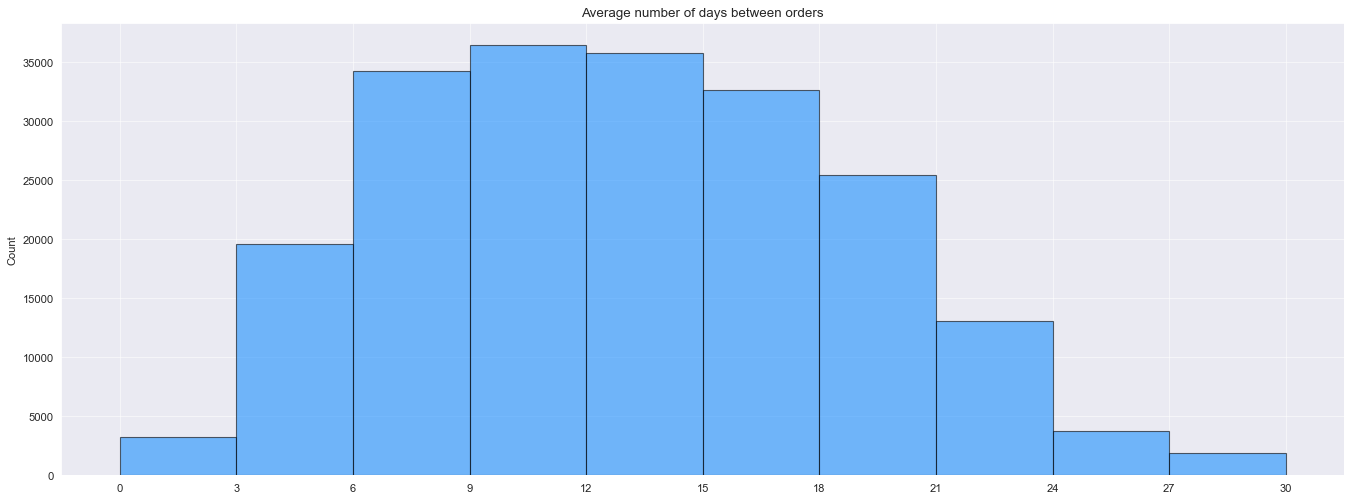

In [115]:
i=1
fig = figure(figsize=(17, 18), dpi=80)

bins_list = np.linspace(start=0,
                            stop=30,
                            num=11)

ax = fig.add_subplot(3,1,i+1)
n, bins, edges = plt.hist(grouped_customer.iloc[:,i],
                                bins= bins_list,
                                ec="k",
                                color = "dodgerblue",
                                alpha=0.6)
plt.xticks(bins_list)
plt.xlabel('')
plt.ylabel('Count')
plt.grid(axis = "both", alpha = 0.6)
plt.title(str(d[grouped_customer.columns[i]]))
fig.tight_layout()
plt.show()

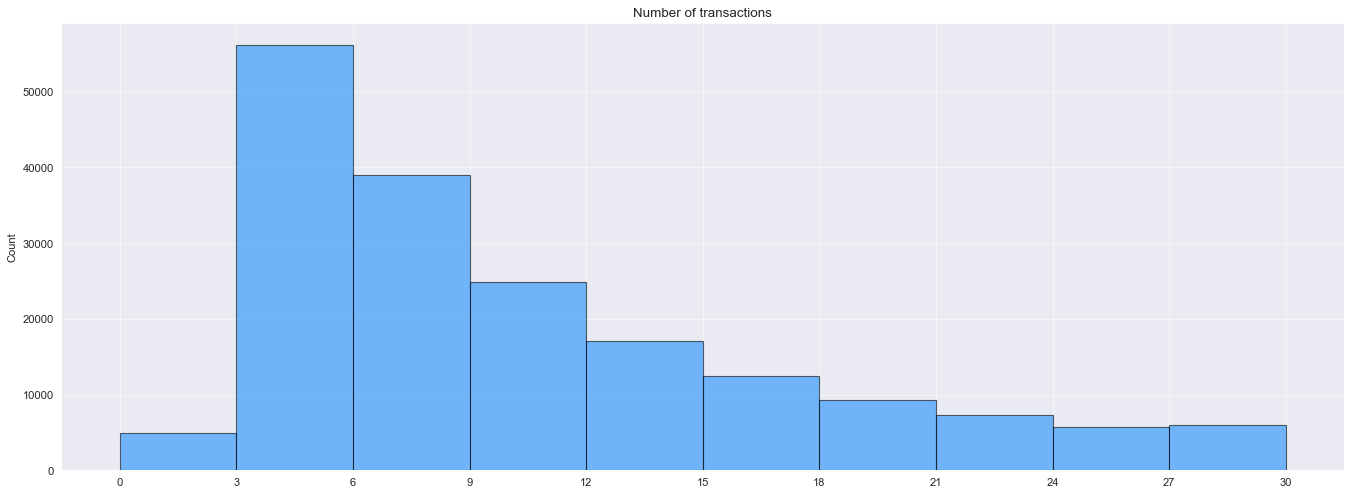

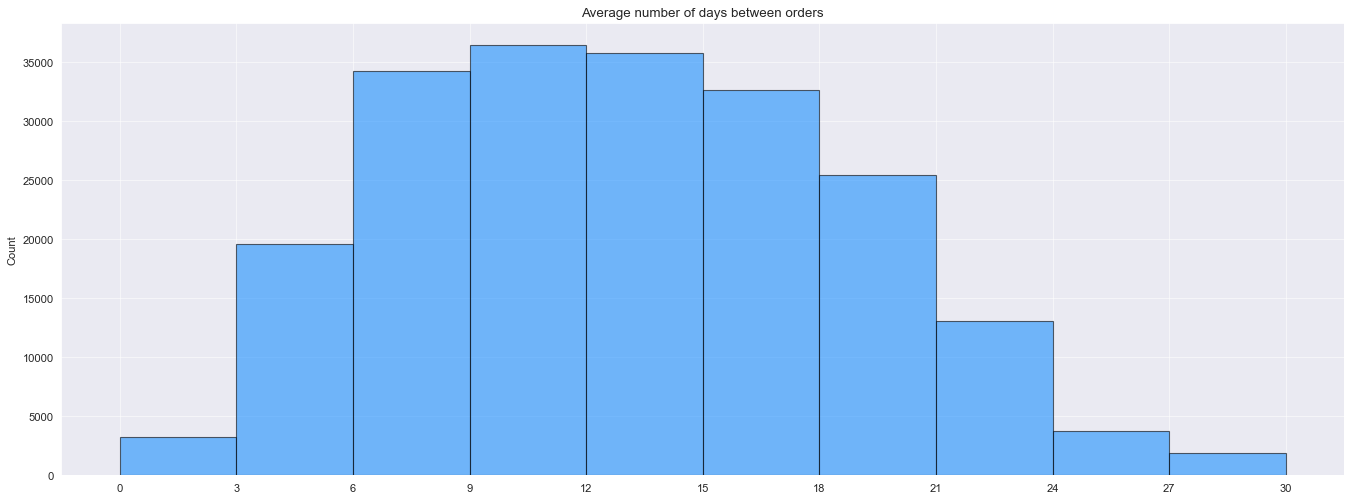

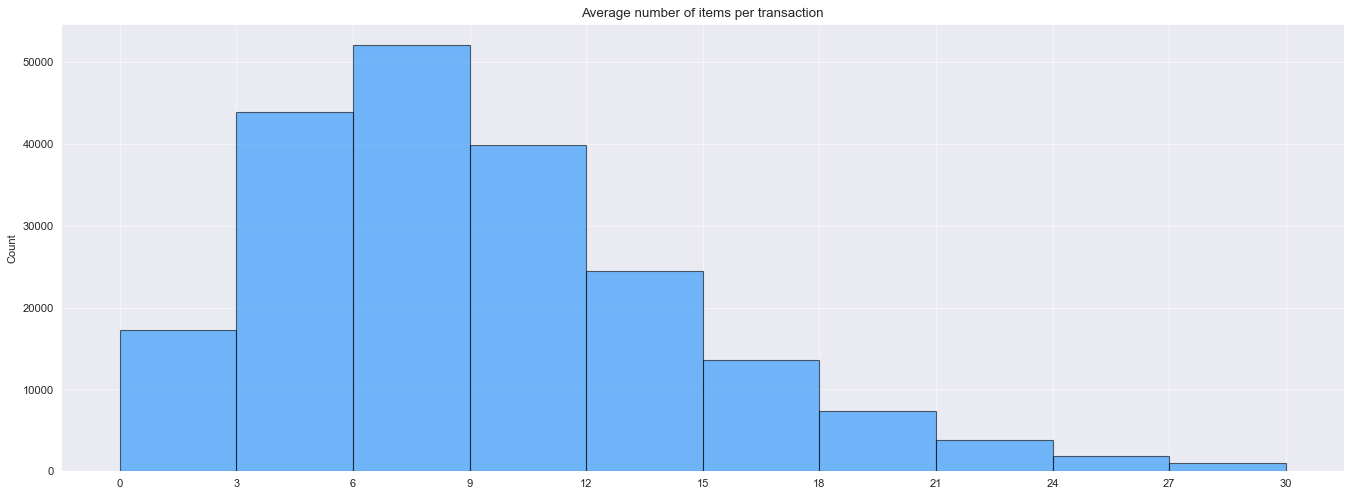

In [116]:
i=2
fig = figure(figsize=(17, 18), dpi=80)

bins_list = np.linspace(start=0,
                            stop=60,
                            num=21)

ax = fig.add_subplot(3,1,i+1)
n, bins, edges = plt.hist(grouped_customer.iloc[:,i],
                                bins= bins_list,
                                ec="k",
                                color = "dodgerblue",
                                alpha=0.6)
plt.xticks(bins_list)
plt.xlabel('')
plt.ylabel('Count')
plt.grid(axis = "both", alpha = 0.6)
plt.title(str(d[grouped_customer.columns[i]]))
fig.tight_layout()
plt.show()

Skalowanie danych

In [100]:
grouped_customer = grouped_customer.loc[grouped_customer.mean_item_count.isna()==False]

In [101]:
scaler = StandardScaler()

In [102]:
grouped_customer_scaled = scaler.fit_transform(grouped_customer)

# **Klastrowanie przy użyciu k-means**

In [103]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=50, random_state=42)

In [104]:
kmeans.fit(grouped_customer_scaled)

KMeans(max_iter=50, n_clusters=3, n_init=10, random_state=42)

In [105]:
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

In [106]:
grouped_customer.columns

Index(['count_transaction_id', 'mean_days_since_prior_order',
       'mean_item_count'],
      dtype='object')

Stworzenie trójwymiarowego wykresu - wzięcie pod uwagę 3 zmiennych

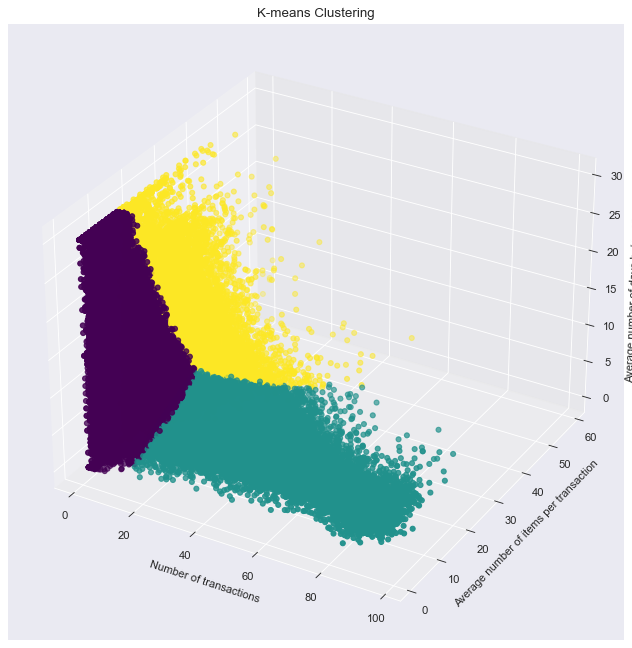

In [107]:
fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(grouped_customer.iloc[:, 0],
           grouped_customer.iloc[:, 2],
           grouped_customer.iloc[:, 1], c=clusters, cmap='viridis')

ax.set_title('K-means Clustering')
ax.set_xlabel(d[grouped_customer.columns[0]])
ax.set_ylabel(d[grouped_customer.columns[2]])
ax.set_zlabel(d[grouped_customer.columns[1]])
plt.show()

Klastrowanie przy użyciu dwóch zmiennych - `Number of transactions` i `Average number of days between orders`

In [108]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=50, random_state=42)
kmeans.fit(grouped_customer_scaled)
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

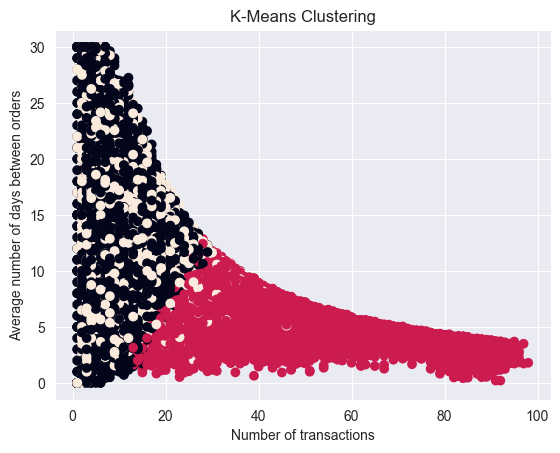

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(grouped_customer.iloc[:,0],
                     grouped_customer.iloc[:,1],
                     c=clusters)

ax.set_title('K-Means Clustering')
ax.set_xlabel(d[grouped_customer.columns[0]])
ax.set_ylabel(d[grouped_customer.columns[1]])

plt.show()

Klastrowanie przy użyciu dwóch zmiennych -`Average number of days between orders` oraz `Average number of items per transaction`

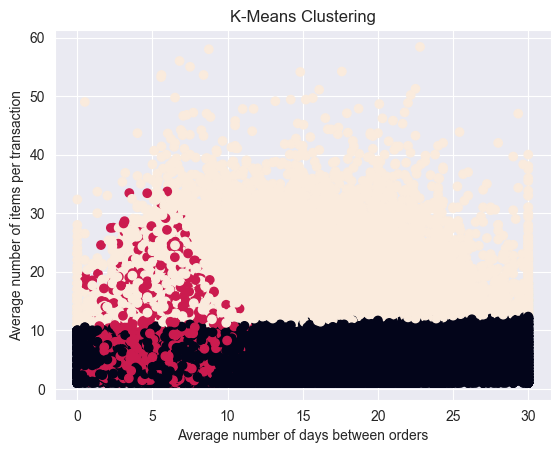

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(grouped_customer.iloc[:,1],
                     grouped_customer.iloc[:,2],
                     c=clusters)

ax.set_title('K-Means Clustering')
ax.set_xlabel(d[grouped_customer.columns[1]])
ax.set_ylabel(d[grouped_customer.columns[2]])

#plt.colorbar(scatter)
plt.show()

Klastrowanie przy użyciu dwóch zmiennych - `Number of transactions` i `Average number of items per transaction`

In [120]:
kmeans.fit(grouped_customer_scaled[:,[0,2]])

In [117]:
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

KMeans(max_iter=50, n_clusters=3, n_init=10, random_state=42)

In [121]:
sns.set_palette("Paired")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(grouped_customer.iloc[:,0],
                     grouped_customer.iloc[:,2],
                     c=clusters)

ax.set_title('K-Means Clustering')
ax.set_xlabel(d[grouped_customer.columns[0]])
ax.set_ylabel(d[grouped_customer.columns[2]])

plt.show()

KMeans(max_iter=50, n_clusters=3, n_init=10, random_state=42)

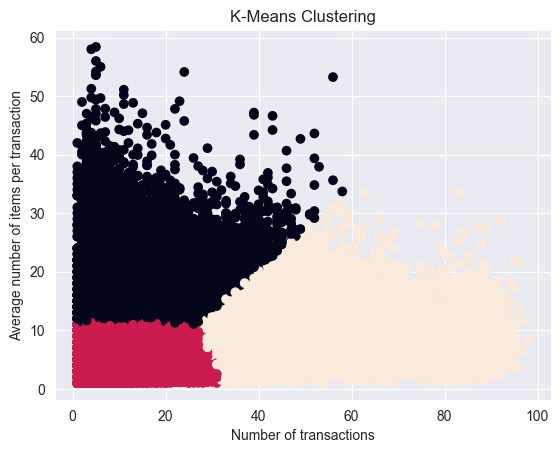